# Mount Drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 4.7MB/s 


In [3]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_Omniglot, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_omniglot_dataloaders_classification
from utils.training import run, evaluate

ModuleNotFoundError: ignored

# Dataset:

In [4]:
batch_size_train = 64
batch_size_test = 64
# Dataset
train_loader, valid_loader, test_loader = get_omniglot_dataloaders_classification(batch_size_train, batch_size_test)

Files already downloaded and verified
Number of training examples: 241
Number of testing examples: 31


# Training:

## Training parameters:

In [0]:
# parameters default values
epochs = 40
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary Network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_Omniglot(binary)
print(name_model)

Omniglot_classif_NonBinaryNet


In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/No_binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded Omniglot_classif_NonBinaryNet


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 91.96 Avg loss: 0.37


## Run Binary Network:

In [0]:
# parameters model to load no Binary model
binary = True
model, name_model = get_my_model_Omniglot(binary)
print(name_model)

Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/Binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 91.55 Avg loss: 0.44


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent

# for regions extraction
import collections
from functools import partial
import cv2

## Modules:

## Load models:

In [6]:
# parameters model to load no Binary model
binary = False
model_no_binary, name_model_no_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_no_binary)

Model Loaded Omniglot_classif_NonBinaryNet


In [24]:
# parameters model to load no Binary model
binary = True
model_binary, name_model_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_binary)

Model Loaded Omniglot_classif_Stochastic_ST_first_conv_binary


## Visualization few predictions:

No binary model


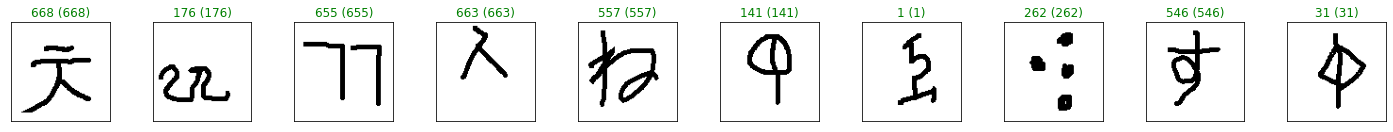

Binary model


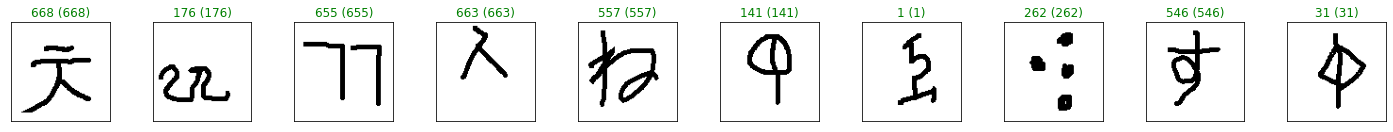

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 702


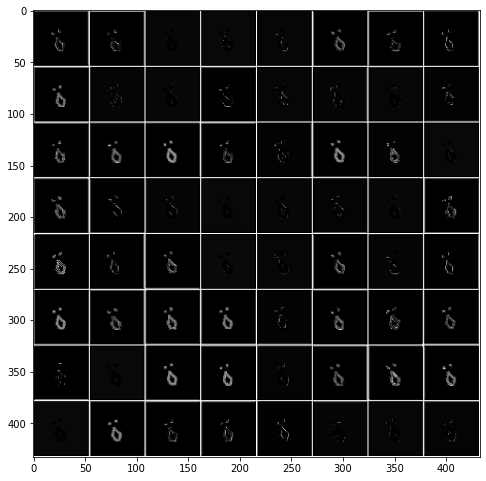

act_layer2 for label 702


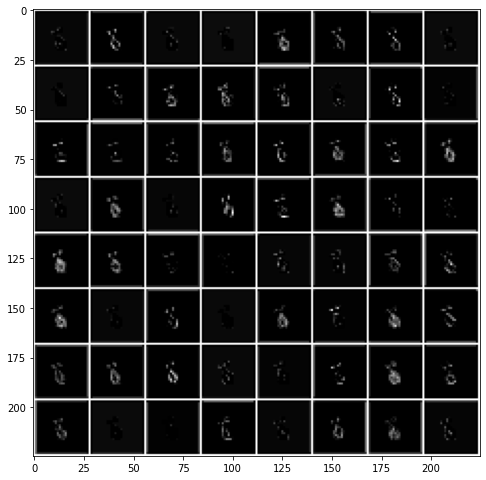

act_layer3 for label 702


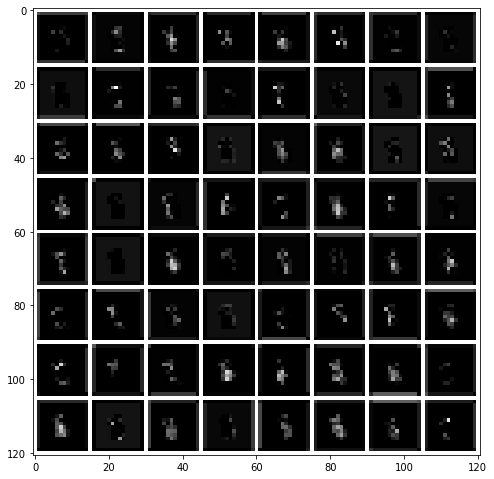

act_layer4 for label 702


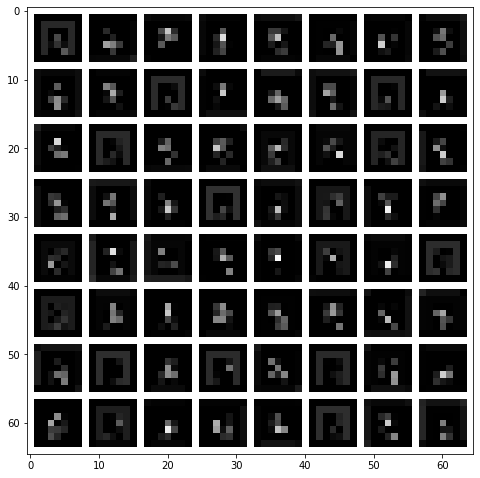

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 702


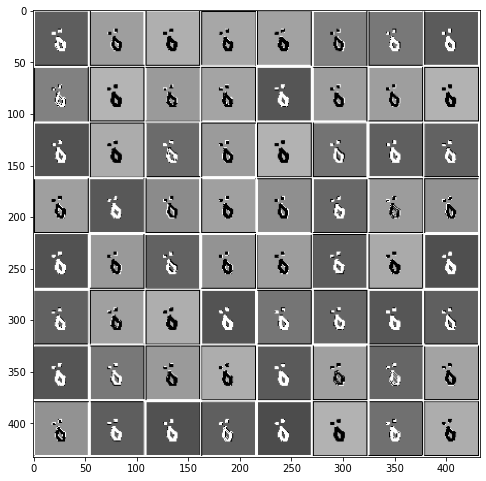

act_layer2 for label 702


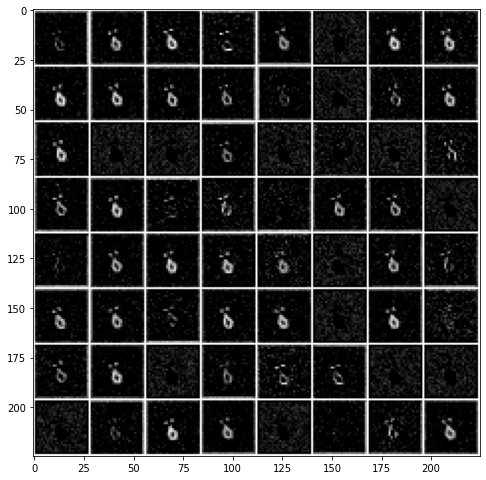

act_layer3 for label 702


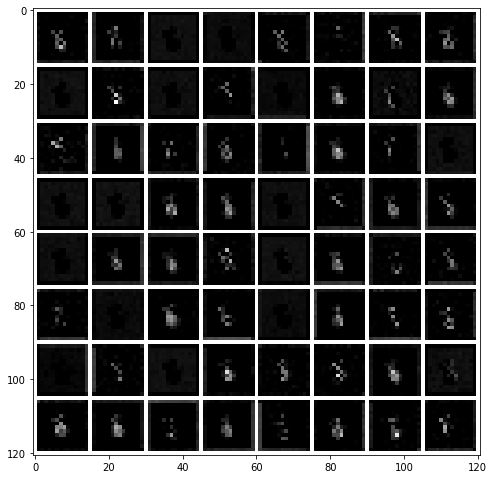

act_layer4 for label 702


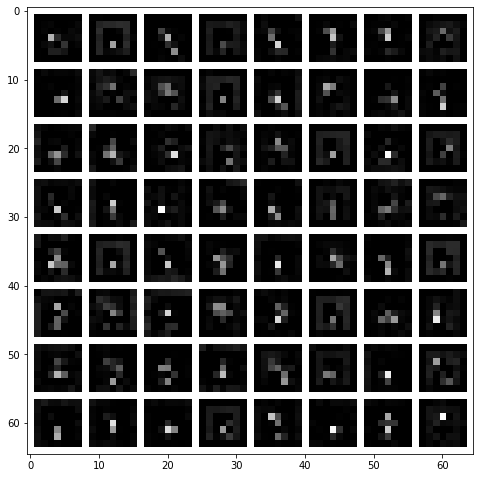

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:

layer:act_layer1 :heatrmap for an image of label 702 with model Omniglot_classif_NonBinaryNet


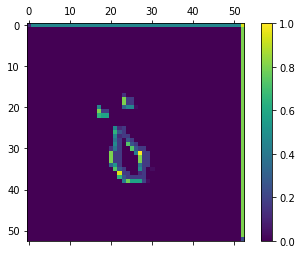

layer:act_layer2 :heatrmap for an image of label 702 with model Omniglot_classif_NonBinaryNet


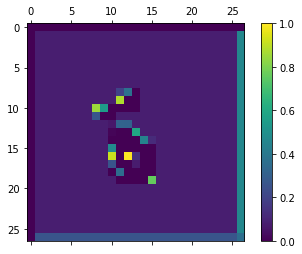

layer:act_layer3 :heatrmap for an image of label 702 with model Omniglot_classif_NonBinaryNet


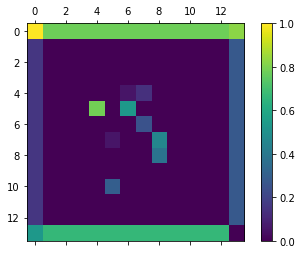

layer:act_layer4 :heatrmap for an image of label 702 with model Omniglot_classif_NonBinaryNet


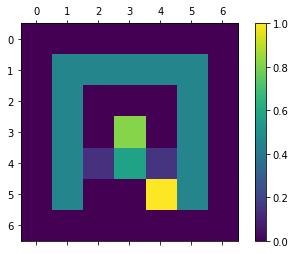

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model_no_binary, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 702 with model Omniglot_classif_Stochastic_ST_first_conv_binary


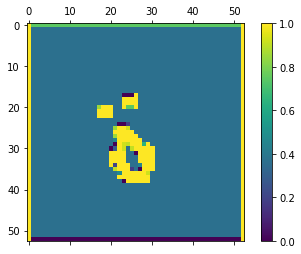

layer:act_layer2 :heatrmap for an image of label 702 with model Omniglot_classif_Stochastic_ST_first_conv_binary


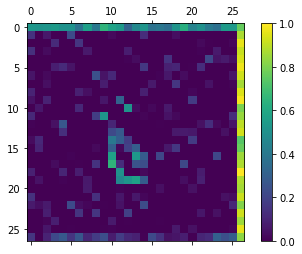

layer:act_layer3 :heatrmap for an image of label 702 with model Omniglot_classif_Stochastic_ST_first_conv_binary


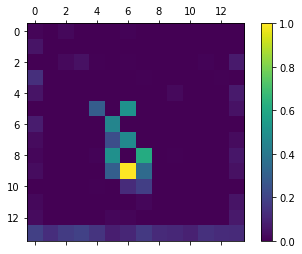

layer:act_layer4 :heatrmap for an image of label 702 with model Omniglot_classif_Stochastic_ST_first_conv_binary


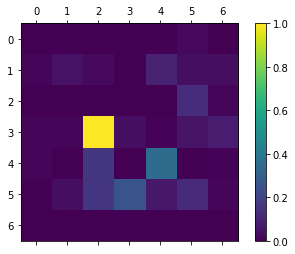

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model_binary, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


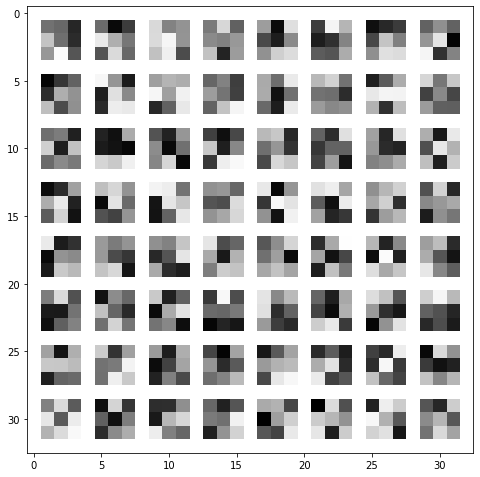

Visualization filters learned for layer: layer2


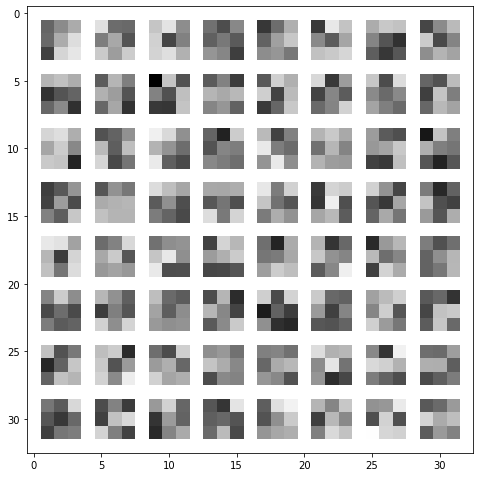

Visualization filters learned for layer: layer3


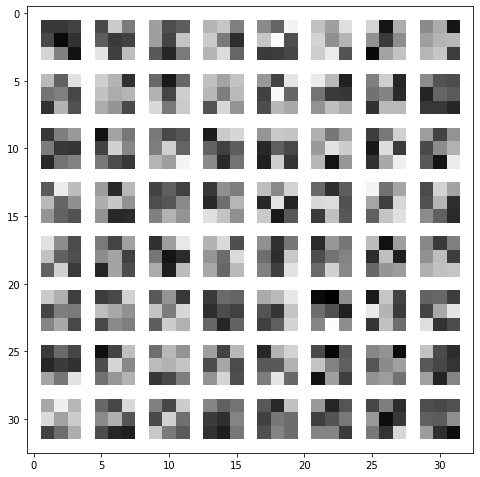

Visualization filters learned for layer: layer4


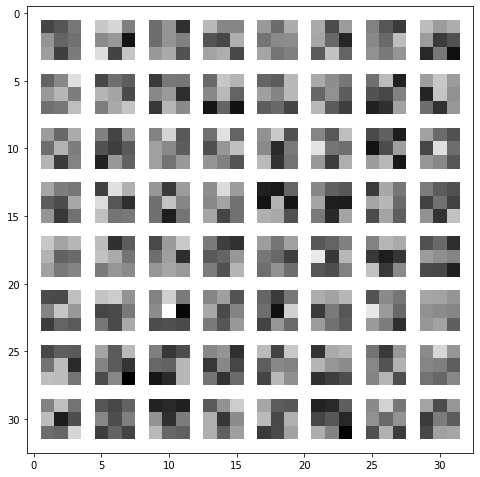

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


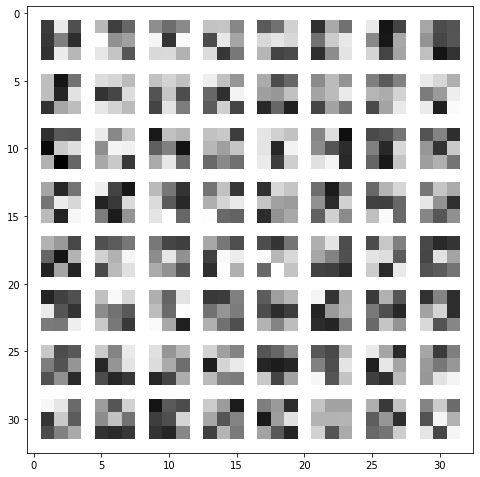

Visualization filters learned for layer: layer2


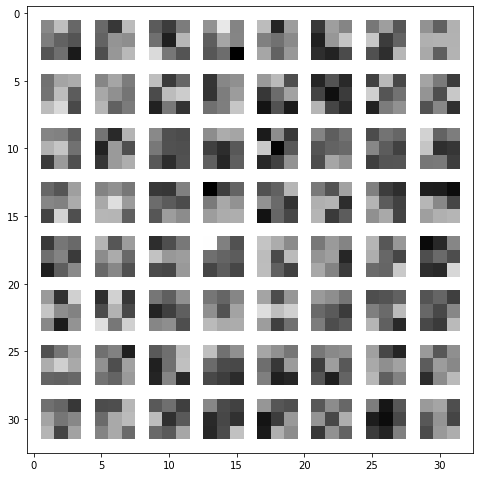

Visualization filters learned for layer: layer3


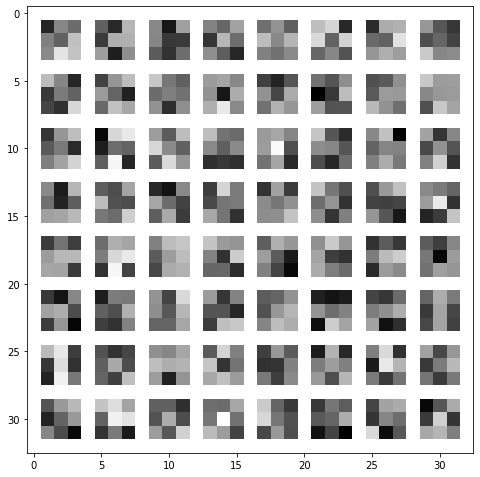

Visualization filters learned for layer: layer4


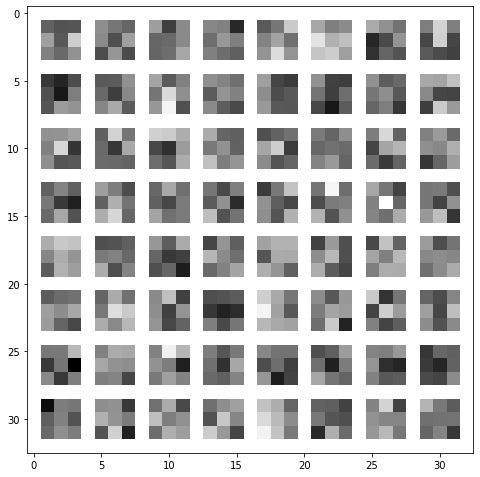

In [0]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_no_binary = model_no_binary.layer3
conv3_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_no_binary = model_no_binary.layer4
conv4_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:323: UserWarning: Attempting to set identical left == right == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin,xmax,ymin,ymax])
/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:323: UserWarning: Attempting to set identical bottom == top == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin,xmax,ymin,ymax])


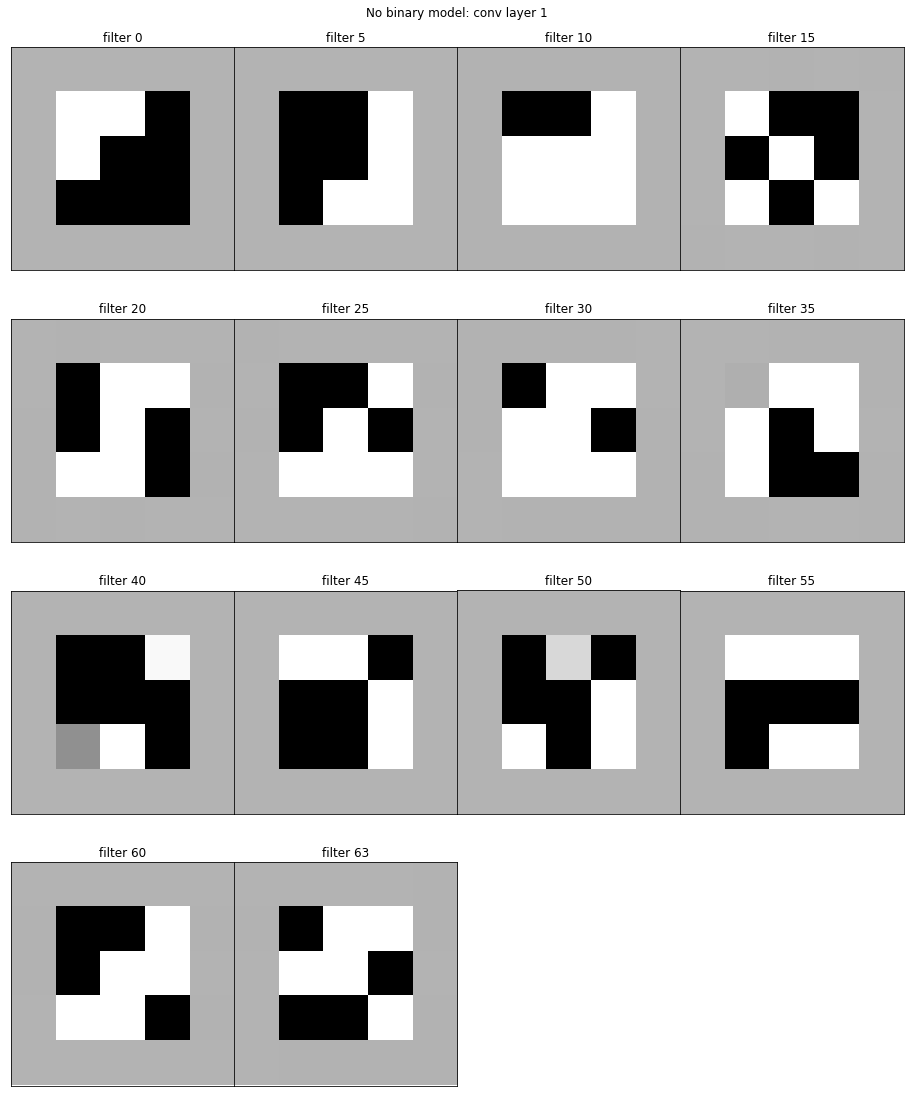

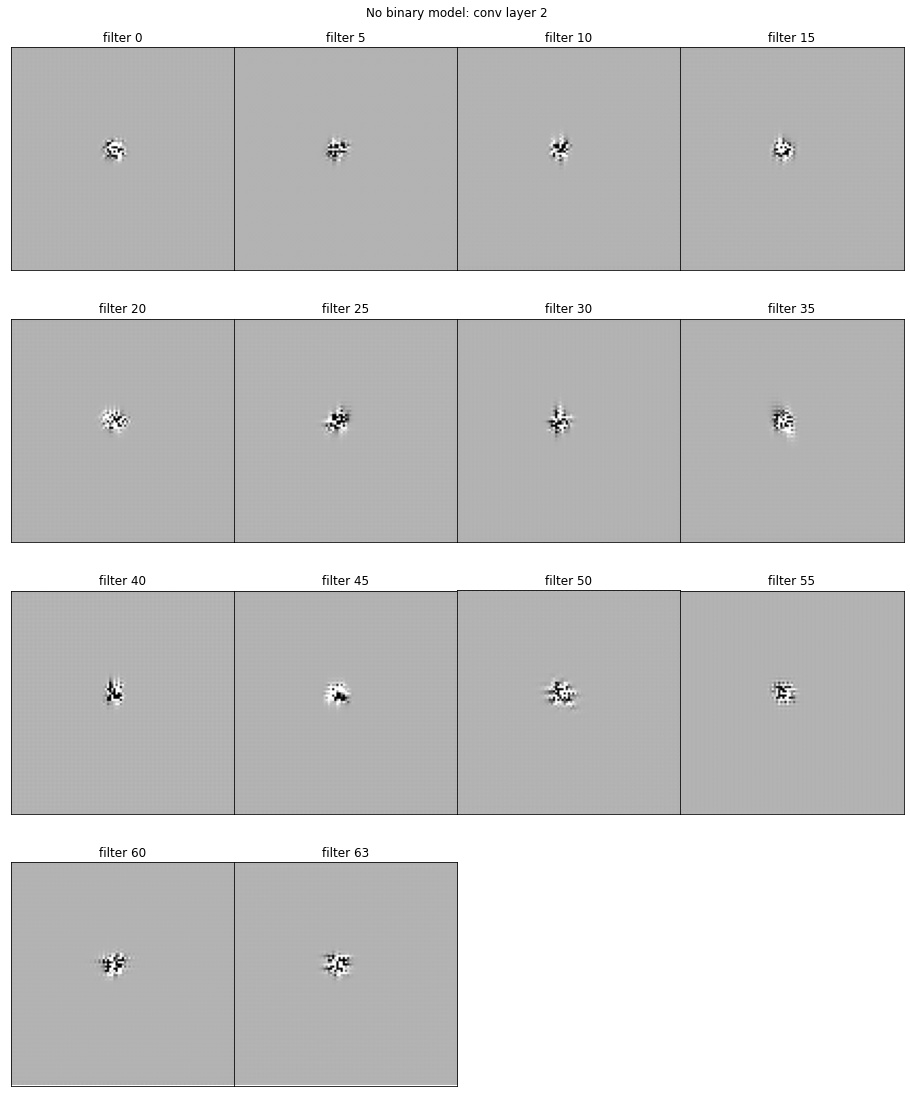

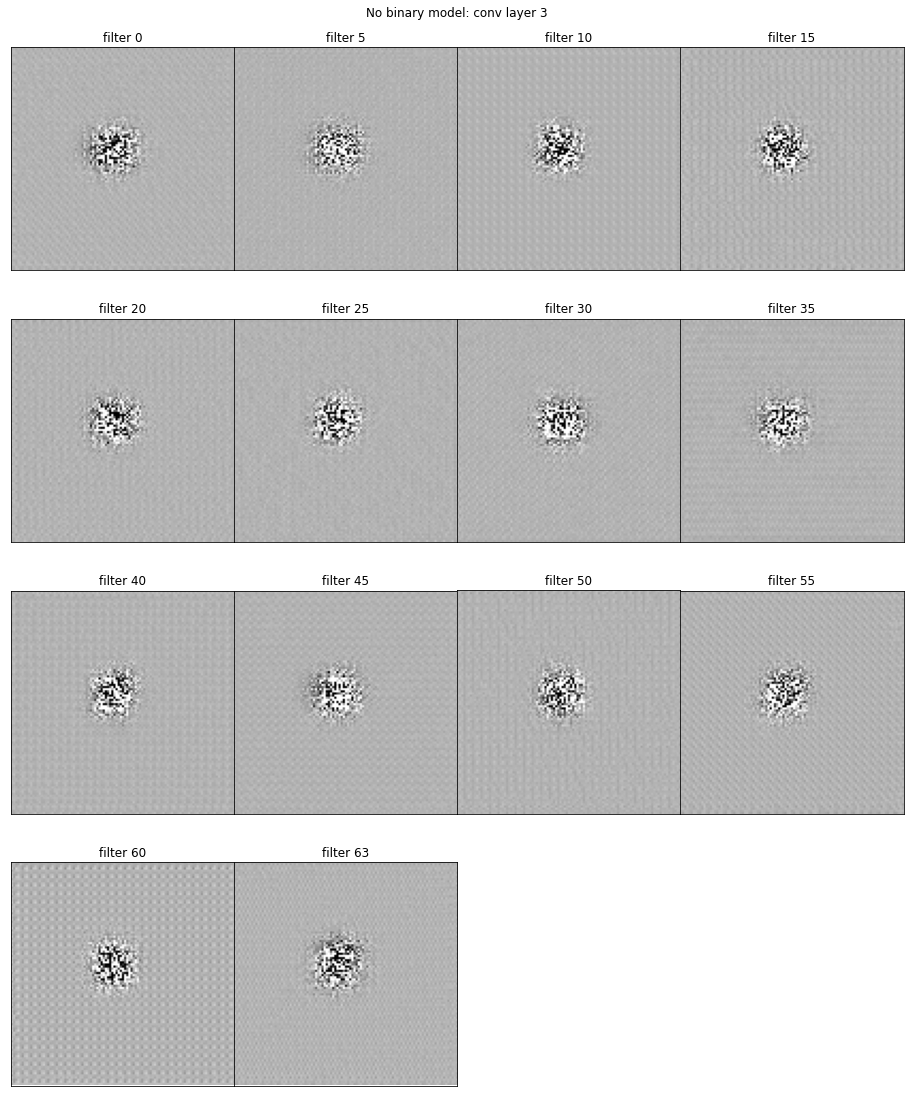

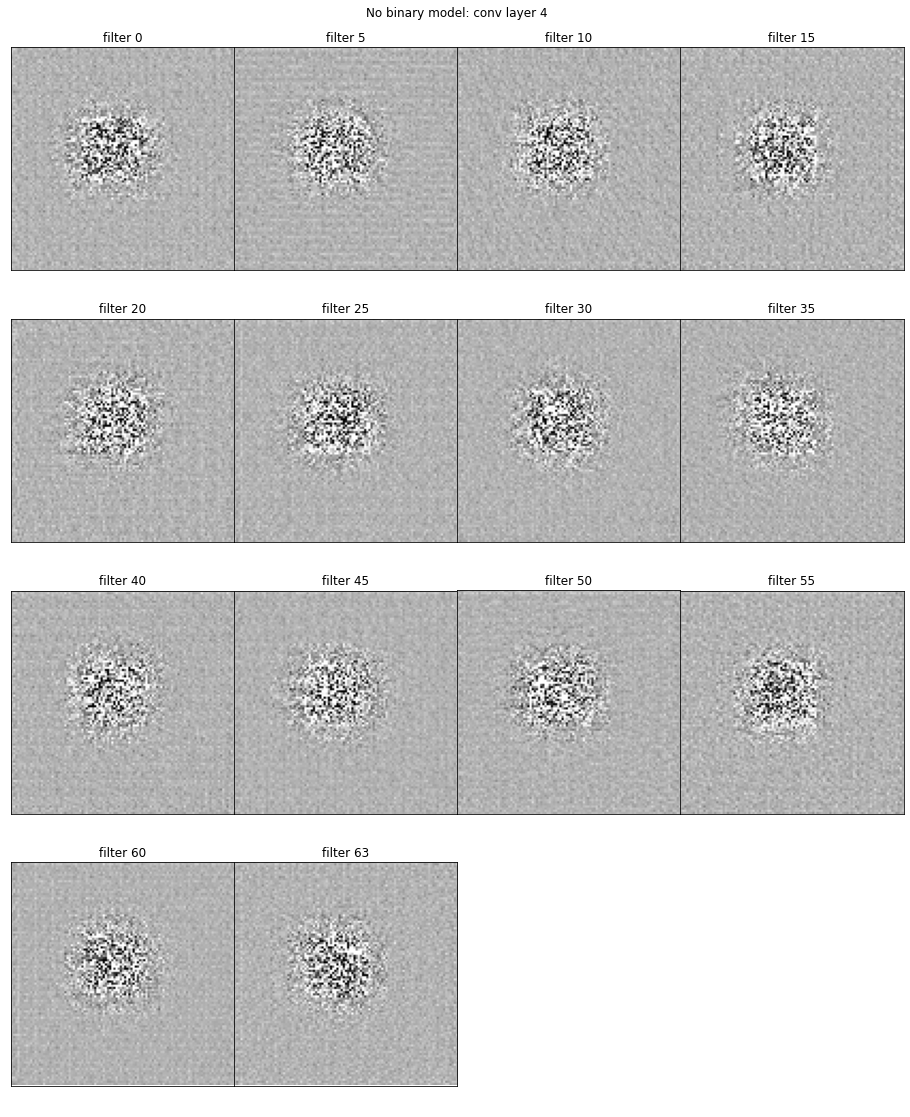

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1', first_conv_layer=True)
g_ascent_no_binary.visualize(conv2_no_binary, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='No binary model: conv layer 2')
g_ascent_no_binary.visualize(conv3_no_binary, conv3_filters_no_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, title='No binary model: conv layer 3')
g_ascent_no_binary.visualize(conv4_no_binary, conv4_filters_no_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, title='No binary model: conv layer 4')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_binary = model_binary.layer2
conv2_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_binary = model_binary.layer3
conv3_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_binary = model_binary.layer4
conv4_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

In [0]:
g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1', first_conv_layer=True)
g_ascent_binary.visualize(conv2_binary, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='Binary model: conv layer 2')
g_ascent_binary.visualize(conv3_binary, conv3_filters_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, title='Binary model: conv layer 3')
g_ascent_binary.visualize(conv4_binary, conv4_filters_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, title='Binary model: conv layer 4')

Output hidden; open in https://colab.research.google.com to view.

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Modules:

In [0]:
def get_region_layer1(image, ind_x, ind_y, name, stride, padding, filter_size):
  """
  return region of interest from index (x,y) in image
  """
  # determine pixel high left of region of interest:
  index_col_hl = (ind_x * stride) - padding
  index_raw_hl = (ind_y * stride) - padding

  if index_col_hl < 0:
    reduice_region_col_size = index_col_hl
    index_col_hl = 0
  else:
    reduice_region_col_size = 0
  if index_raw_hl < 0:
    reduice_region_raw_size = index_raw_hl
    index_raw_hl = 0
  else:
    reduice_region_raw_size = 0

  begin_col = index_col_hl
  end_col = index_col_hl + filter_size + reduice_region_col_size
  begin_raw = index_raw_hl
  end_raw = index_raw_hl + filter_size + reduice_region_raw_size

  if end_col > len_img_w:
    end_col = len_img_w
  if end_raw > len_img_h:
    end_raw = len_img_h

  region = image[begin_raw:end_raw, begin_col:end_col]
  if region.shape != (filter_size, filter_size):
    region = cv2.resize(region, (filter_size, filter_size), interpolation = cv2.INTER_AREA)
  return region

In [0]:
def get_region_layer2(image, ind_x, ind_y, name, stride, padding, filter_size):
  """
  return region of interest from index (x,y)
  """
  region_shape = 7
  # determine pixel high left of region of interest:
  index_col_hl = (ind_x * stride) - padding
  index_raw_hl = (ind_y * stride) - padding

  if index_col_hl < 0:
    index_col_hl = 0
  if index_raw_hl < 0:
    index_raw_hl = 0

  index_col_hl_2 = (index_col_hl * stride) - padding
  index_raw_hl_2 = (index_raw_hl * stride) - padding

  if index_col_hl_2 < 0:
    reduice_region_col_size = index_col_hl_2
    index_col_hl_2 = 0
  else:
    reduice_region_col_size = 0
  if index_raw_hl_2 < 0:
    reduice_region_raw_size = index_raw_hl_2
    index_raw_hl_2 = 0
  else:
    reduice_region_raw_size = 0

  begin_col = index_col_hl_2
  end_col = index_col_hl_2 + ((filter_size*stride)+1) + reduice_region_col_size
  begin_raw = index_raw_hl_2
  end_raw = index_raw_hl_2 + ((filter_size*stride)+1) + reduice_region_raw_size

  if end_col > len_img_w:
    end_col = len_img_w
  if end_raw > len_img_h:
    end_raw = len_img_h

  region = image[begin_raw:end_raw, begin_col:end_col]
  if region.shape != (region_shape, region_shape):
    region = cv2.resize(region, (region_shape, region_shape), interpolation = cv2.INTER_AREA)

  return region

In [0]:
def get_region_layer3(image, ind_x, ind_y, name, stride, padding, filter_size):
  """
  return region of interest from index (x,y)
  """
  region_shape = 7
  # determine pixel high left of region of interest:
  index_col_hl = (ind_x * stride) - padding
  index_raw_hl = (ind_y * stride) - padding

  if index_col_hl < 0:
    index_col_hl = 0
  if index_raw_hl < 0:
    index_raw_hl = 0

  index_col_hl_2 = (index_col_hl * stride) - padding
  index_raw_hl_2 = (index_raw_hl * stride) - padding

  if index_col_hl_2 < 0:
    reduice_region_col_size = index_col_hl_2
    index_col_hl_2 = 0
  else:
    reduice_region_col_size = 0
  if index_raw_hl_2 < 0:
    reduice_region_raw_size = index_raw_hl_2
    index_raw_hl_2 = 0
  else:
    reduice_region_raw_size = 0

  begin_col = index_col_hl_2
  end_col = index_col_hl_2 + ((filter_size*stride)+1) + reduice_region_col_size
  begin_raw = index_raw_hl_2
  end_raw = index_raw_hl_2 + ((filter_size*stride)+1) + reduice_region_raw_size

  if end_col > len_img_w:
    end_col = len_img_w
  if end_raw > len_img_h:
    end_raw = len_img_h

  region = image[begin_raw:end_raw, begin_col:end_col]
  if region.shape != (region_shape, region_shape):
    region = cv2.resize(region, (region_shape, region_shape), interpolation = cv2.INTER_AREA)

  return region

In [0]:
def get_region_layer4(image, ind_x, ind_y, name, stride, padding, filter_size):
  """
  return region of interest from index (x,y)
  """
  region_shape = 7
  # determine pixel high left of region of interest:
  index_col_hl = (ind_x * stride) - padding
  index_raw_hl = (ind_y * stride) - padding

  if index_col_hl < 0:
    index_col_hl = 0
  if index_raw_hl < 0:
    index_raw_hl = 0

  index_col_hl_2 = (index_col_hl * stride) - padding
  index_raw_hl_2 = (index_raw_hl * stride) - padding

  if index_col_hl_2 < 0:
    reduice_region_col_size = index_col_hl_2
    index_col_hl_2 = 0
  else:
    reduice_region_col_size = 0
  if index_raw_hl_2 < 0:
    reduice_region_raw_size = index_raw_hl_2
    index_raw_hl_2 = 0
  else:
    reduice_region_raw_size = 0

  begin_col = index_col_hl_2
  end_col = index_col_hl_2 + ((filter_size*stride)+1) + reduice_region_col_size
  begin_raw = index_raw_hl_2
  end_raw = index_raw_hl_2 + ((filter_size*stride)+1) + reduice_region_raw_size

  if end_col > len_img_w:
    end_col = len_img_w
  if end_raw > len_img_h:
    end_raw = len_img_h

  region = image[begin_raw:end_raw, begin_col:end_col]
  if region.shape != (region_shape, region_shape):
    region = cv2.resize(region, (region_shape, region_shape), interpolation = cv2.INTER_AREA)

  return region

In [0]:
def get_all_regions_max(loader, activations):

    dataiter = iter(loader)
    images, _ = dataiter.next()
    print('nb images: {}'.format(len(images)))

    print('begin extraction regions')
    region_final = {}
    activation_final = {}
    for name, fm in activations.items():
      # for each image of fm 
      if name=='layer1':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 3, 3))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer2':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer3':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer4':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      for j in range(fm.shape[0]):
          print('treating image n {}/{}, for layer: {}'.format(j, fm.shape[0], name))
          
          im = images[j].unsqueeze(0).numpy().squeeze()  # image i of batch batch: numpy array: (28,28)
          if name=='layer1':
            regions_im_j = np.zeros((fm.shape[1], 3, 3))  # initialise empty list of regions for batch batch
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer2':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer3':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer3':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            activation_im_j = np.zeros((fm.shape[1]))
          for i in range(fm.shape[1]):  # for all fm in image j
            act_max = max(fm[j][i].min(), fm[j][i].max(), key=abs)  # get max activation value in fm j
            ind_x = int((np.where(fm[j][i]==act_max)[0])[0])  # get index (x,y) of act_max
            ind_y = int((np.where(fm[j][i]==act_max)[1])[0])

            if name=='layer1':
              region = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size)
            if name=='layer2':
              region = get_region_layer2(im, ind_x, ind_y, name, stride, padding, filter_size)
            if name=='layer3':
              region = get_region_layer3(im, ind_x, ind_y, name, stride, padding, filter_size)
            if name=='layer4':
              region = get_region_layer4(im, ind_x, ind_y, name, stride, padding, filter_size)
            
            regions_im_j[i] = region
            activation_im_j[i] = act_max.detach().numpy()
          regions_layer[j] = regions_im_j
          activation_layer[j] = activation_im_j
      region_final[name] = regions_layer
      activation_final[name] = activation_layer

    return region_final, activation_final

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())

In [9]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([64, 64, 53, 53])
layer2 torch.Size([64, 64, 27, 27])
layer3 torch.Size([64, 64, 14, 14])
layer4 torch.Size([64, 64, 7, 7])


In [18]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_no_binary)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
region_layer3_no_binary = region_final['layer3']
region_layer4_no_binary = region_final['layer4']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer3_no_binary = activation_final['layer3']
activation_layer4_no_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

nb images: 64
begin extraction regions
treating image n 0/64, for layer: layer1
treating image n 1/64, for layer: layer1
treating image n 2/64, for layer: layer1
treating image n 3/64, for layer: layer1
treating image n 4/64, for layer: layer1
treating image n 5/64, for layer: layer1
treating image n 6/64, for layer: layer1
treating image n 7/64, for layer: layer1
treating image n 8/64, for layer: layer1
treating image n 9/64, for layer: layer1
treating image n 10/64, for layer: layer1
treating image n 11/64, for layer: layer1
treating image n 12/64, for layer: layer1
treating image n 13/64, for layer: layer1
treating image n 14/64, for layer: layer1
treating image n 15/64, for layer: layer1
treating image n 16/64, for layer: layer1
treating image n 17/64, for layer: layer1
treating image n 18/64, for layer: layer1
treating image n 19/64, for layer: layer1
treating image n 20/64, for layer: layer1
treating image n 21/64, for layer: layer1
treating image n 22/64, for layer: layer1
treat

In [0]:
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [27]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

layer1 torch.Size([64, 64, 53, 53])
layer2 torch.Size([64, 64, 27, 27])
layer3 torch.Size([64, 64, 14, 14])
layer4 torch.Size([64, 64, 7, 7])


In [28]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_binary)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
region_layer3_binary = region_final['layer3']
region_layer4_binary = region_final['layer4']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer3_binary = activation_final['layer3']
activation_layer4_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

nb images: 64
begin extraction regions
treating image n 0/64, for layer: layer1
treating image n 1/64, for layer: layer1
treating image n 2/64, for layer: layer1
treating image n 3/64, for layer: layer1
treating image n 4/64, for layer: layer1
treating image n 5/64, for layer: layer1
treating image n 6/64, for layer: layer1
treating image n 7/64, for layer: layer1
treating image n 8/64, for layer: layer1
treating image n 9/64, for layer: layer1
treating image n 10/64, for layer: layer1
treating image n 11/64, for layer: layer1
treating image n 12/64, for layer: layer1
treating image n 13/64, for layer: layer1
treating image n 14/64, for layer: layer1
treating image n 15/64, for layer: layer1
treating image n 16/64, for layer: layer1
treating image n 17/64, for layer: layer1
treating image n 18/64, for layer: layer1
treating image n 19/64, for layer: layer1
treating image n 20/64, for layer: layer1
treating image n 21/64, for layer: layer1
treating image n 22/64, for layer: layer1
treat

In [0]:
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

#### Modules visualize regions max:

In [0]:
def get_regions_interest(regions, activation, best, worst, viz_mean_img, viz_grid, percentage=None, list_filter = None):
  """
  get regions of interest
  """
  nb_filter = activation.shape[1]

  if best==False and worst==False:
    assert percentage!=None, "if don't choice best or worst value, you didn't choice a percentage value"
  if best==True and worst==True:
    raise TypeError('choice only one value at True between best an worst')

  # consider only regions of all image of list_filter or all filter
  if list_filter == None:
    print('Interest of all filters')
    regions_interest_filter = regions
    activations_values_interest = activation
    nb_filter = nb_filter
  else:
    assert max(list_filter) < nb_filter and min(list_filter) >= 0, 'filter choisen out of range'
    print('Interest of filters:', list_filter)
    regions_interest_filter = get_index_filter_interest(regions, list_filter)
    activations_values_interest = activation[:, list_filter]
    nb_filter = len(list_filter)

  # consider a percent of best or worst activations:
  if percentage == None:
    print('Consider all image regions')
    selected_regions = regions_interest_filter
  else:
    assert percentage <= 100 and percentage >= 0, 'percentage value must be in 0 and 100'
    n = int((len(activation)*percentage)/100)
    print('Consider {}% image regions = {} images'.format(percentage, n))
    selected_regions = get_n_first_regions_index(best, worst, n, activations_values_interest, nb_filter, regions_interest_filter)

  nb_regions = selected_regions[0].shape[0]

  # visualization: one mean image or grid image:
  if viz_mean_img:
      nb_image = 1
      print('mean image:')
      for i, ind_filter in enumerate(list_filter):
        print('mean regions of {} regions more={} or worst={} active for filter number: {} :'.format(n, best, worst, ind_filter))
        mean_img = np.mean(selected_regions[i], 0)
        viz_regions(nb_image, mean_img)

  if viz_grid:
      nb_image = nb_regions
      print('grid image')
      for i, ind_filter in enumerate(list_filter):
        region_to_print = []
        print('grid regions of {} regions more={} or worst={} active for filter number: {} :'.format(n, best, worst, ind_filter))
        for j in range(nb_regions):
          region_to_print.append(selected_regions[i][j])
        viz_regions(nb_image, region_to_print)
        
  return selected_regions


def viz_regions(nb_image, regions):
  """
  visualize region of interest
  """
  regions = torch.tensor(regions) 
  regions = regions.reshape((nb_image,1,regions.shape[-2],regions.shape[-1]))
  visTensor(regions, ch=0, allkernels=False)
  plt.ioff()
  plt.show()


def get_n_first_regions_index(best, worst, n, activation, nb_filter, regions):
  """
  select only regions that we want 
  """
  regions_selected = []
  if best:
    for i in range(nb_filter):
      ind_filter = (-activation[:, i]).argsort()[:n]
      regions_selected.append(regions[ind_filter, i])
    return regions_selected

  elif worst:
    for i in range(nb_filter):
      ind_filter = activation[:, i].argsort()[:n]
      regions_selected.append(regions[ind_filter, i])
    return regions_selected

  else:
    print('choice worst or best with bool True or False')


def get_index_filter_interest(regions, list_filter):
  """
  extract only regions of the filter interest
  """
  return regions[:, list_filter]

#### Viz:

##### No binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 6 images
mean image:
mean regions of 6 regions more=True or worst=False active for filter number: 0 :


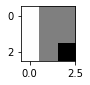

mean regions of 6 regions more=True or worst=False active for filter number: 1 :


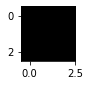

mean regions of 6 regions more=True or worst=False active for filter number: 2 :


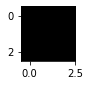

mean regions of 6 regions more=True or worst=False active for filter number: 3 :


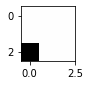

mean regions of 6 regions more=True or worst=False active for filter number: 4 :


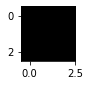

mean regions of 6 regions more=True or worst=False active for filter number: 5 :


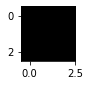

mean regions of 6 regions more=True or worst=False active for filter number: 6 :


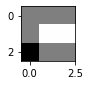

mean regions of 6 regions more=True or worst=False active for filter number: 7 :


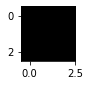

mean regions of 6 regions more=True or worst=False active for filter number: 8 :


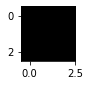

mean regions of 6 regions more=True or worst=False active for filter number: 9 :


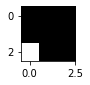

grid image
grid regions of 6 regions more=True or worst=False active for filter number: 0 :


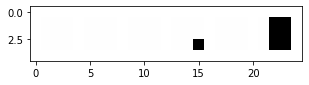

grid regions of 6 regions more=True or worst=False active for filter number: 1 :


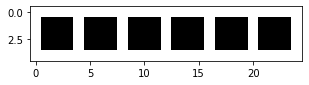

grid regions of 6 regions more=True or worst=False active for filter number: 2 :


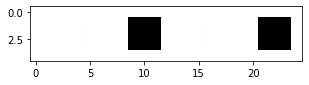

grid regions of 6 regions more=True or worst=False active for filter number: 3 :


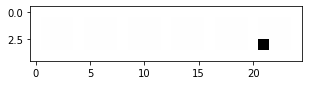

grid regions of 6 regions more=True or worst=False active for filter number: 4 :


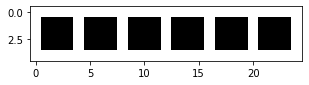

grid regions of 6 regions more=True or worst=False active for filter number: 5 :


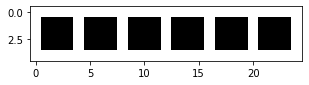

grid regions of 6 regions more=True or worst=False active for filter number: 6 :


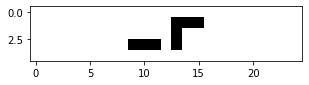

grid regions of 6 regions more=True or worst=False active for filter number: 7 :


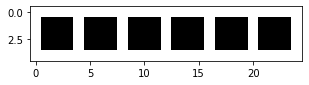

grid regions of 6 regions more=True or worst=False active for filter number: 8 :


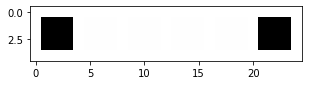

grid regions of 6 regions more=True or worst=False active for filter number: 9 :


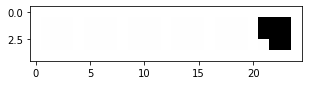

In [22]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### No binary model layer2:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 10% image regions = 6 images
mean image:
mean regions of 6 regions more=True or worst=False active for filter number: 0 :


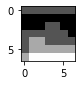

mean regions of 6 regions more=True or worst=False active for filter number: 1 :


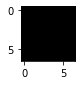

mean regions of 6 regions more=True or worst=False active for filter number: 2 :


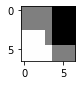

mean regions of 6 regions more=True or worst=False active for filter number: 3 :


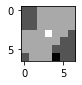

mean regions of 6 regions more=True or worst=False active for filter number: 4 :


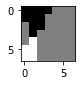

mean regions of 6 regions more=True or worst=False active for filter number: 5 :


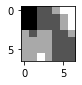

mean regions of 6 regions more=True or worst=False active for filter number: 6 :


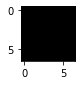

mean regions of 6 regions more=True or worst=False active for filter number: 7 :


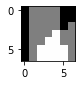

mean regions of 6 regions more=True or worst=False active for filter number: 8 :


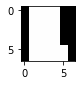

mean regions of 6 regions more=True or worst=False active for filter number: 9 :


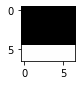

mean regions of 6 regions more=True or worst=False active for filter number: 10 :


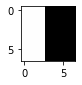

mean regions of 6 regions more=True or worst=False active for filter number: 11 :


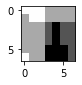

mean regions of 6 regions more=True or worst=False active for filter number: 12 :


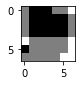

mean regions of 6 regions more=True or worst=False active for filter number: 13 :


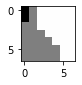

mean regions of 6 regions more=True or worst=False active for filter number: 14 :


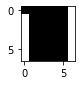

mean regions of 6 regions more=True or worst=False active for filter number: 15 :


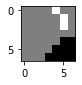

mean regions of 6 regions more=True or worst=False active for filter number: 16 :


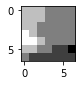

mean regions of 6 regions more=True or worst=False active for filter number: 17 :


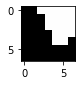

mean regions of 6 regions more=True or worst=False active for filter number: 18 :


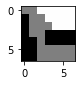

mean regions of 6 regions more=True or worst=False active for filter number: 19 :


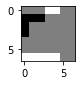

grid image
grid regions of 6 regions more=True or worst=False active for filter number: 0 :


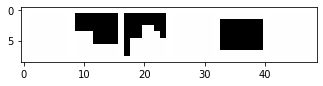

grid regions of 6 regions more=True or worst=False active for filter number: 1 :


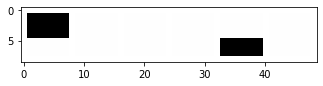

grid regions of 6 regions more=True or worst=False active for filter number: 2 :


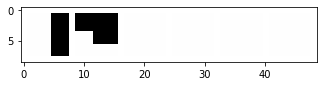

grid regions of 6 regions more=True or worst=False active for filter number: 3 :


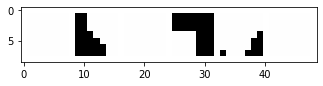

grid regions of 6 regions more=True or worst=False active for filter number: 4 :


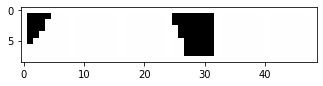

grid regions of 6 regions more=True or worst=False active for filter number: 5 :


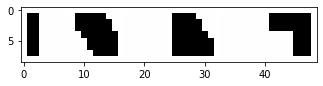

grid regions of 6 regions more=True or worst=False active for filter number: 6 :


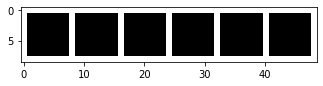

grid regions of 6 regions more=True or worst=False active for filter number: 7 :


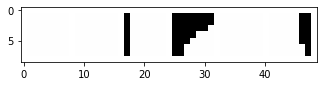

grid regions of 6 regions more=True or worst=False active for filter number: 8 :


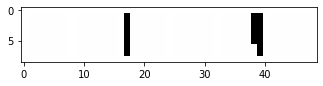

grid regions of 6 regions more=True or worst=False active for filter number: 9 :


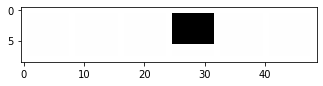

grid regions of 6 regions more=True or worst=False active for filter number: 10 :


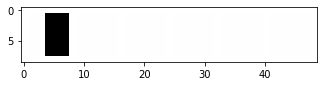

grid regions of 6 regions more=True or worst=False active for filter number: 11 :


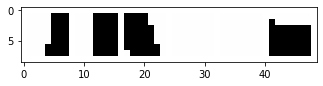

grid regions of 6 regions more=True or worst=False active for filter number: 12 :


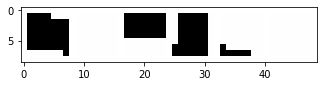

grid regions of 6 regions more=True or worst=False active for filter number: 13 :


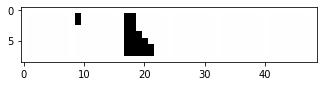

grid regions of 6 regions more=True or worst=False active for filter number: 14 :


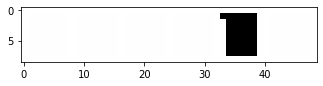

grid regions of 6 regions more=True or worst=False active for filter number: 15 :


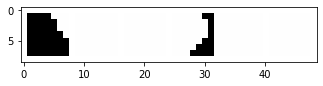

grid regions of 6 regions more=True or worst=False active for filter number: 16 :


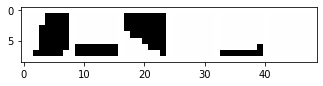

grid regions of 6 regions more=True or worst=False active for filter number: 17 :


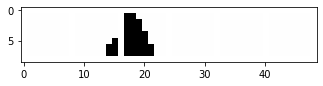

grid regions of 6 regions more=True or worst=False active for filter number: 18 :


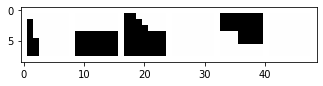

grid regions of 6 regions more=True or worst=False active for filter number: 19 :


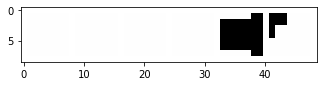

In [23]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

##### Binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 6 images
mean image:
mean regions of 6 regions more=True or worst=False active for filter number: 0 :


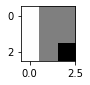

mean regions of 6 regions more=True or worst=False active for filter number: 1 :


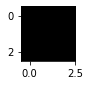

mean regions of 6 regions more=True or worst=False active for filter number: 2 :


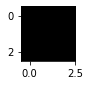

mean regions of 6 regions more=True or worst=False active for filter number: 3 :


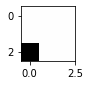

mean regions of 6 regions more=True or worst=False active for filter number: 4 :


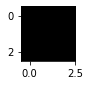

mean regions of 6 regions more=True or worst=False active for filter number: 5 :


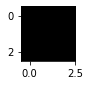

mean regions of 6 regions more=True or worst=False active for filter number: 6 :


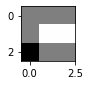

mean regions of 6 regions more=True or worst=False active for filter number: 7 :


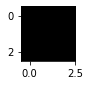

mean regions of 6 regions more=True or worst=False active for filter number: 8 :


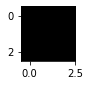

mean regions of 6 regions more=True or worst=False active for filter number: 9 :


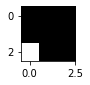

grid image
grid regions of 6 regions more=True or worst=False active for filter number: 0 :


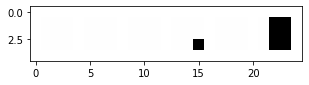

grid regions of 6 regions more=True or worst=False active for filter number: 1 :


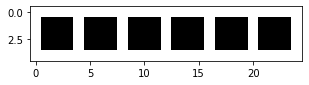

grid regions of 6 regions more=True or worst=False active for filter number: 2 :


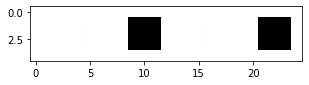

grid regions of 6 regions more=True or worst=False active for filter number: 3 :


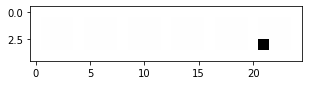

grid regions of 6 regions more=True or worst=False active for filter number: 4 :


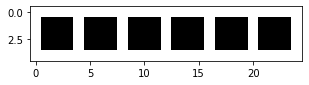

grid regions of 6 regions more=True or worst=False active for filter number: 5 :


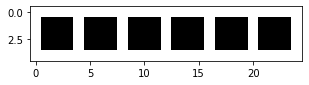

grid regions of 6 regions more=True or worst=False active for filter number: 6 :


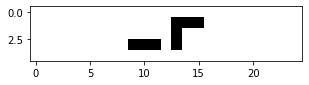

grid regions of 6 regions more=True or worst=False active for filter number: 7 :


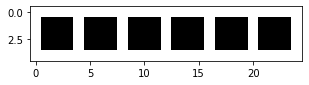

grid regions of 6 regions more=True or worst=False active for filter number: 8 :


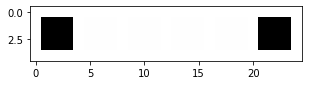

grid regions of 6 regions more=True or worst=False active for filter number: 9 :


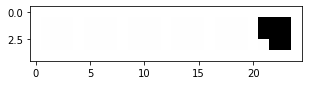

In [32]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 10% image regions = 6 images
mean image:
mean regions of 6 regions more=True or worst=False active for filter number: 0 :


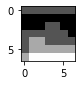

mean regions of 6 regions more=True or worst=False active for filter number: 1 :


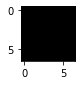

mean regions of 6 regions more=True or worst=False active for filter number: 2 :


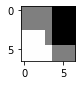

mean regions of 6 regions more=True or worst=False active for filter number: 3 :


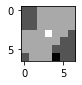

mean regions of 6 regions more=True or worst=False active for filter number: 4 :


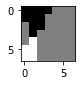

mean regions of 6 regions more=True or worst=False active for filter number: 5 :


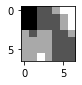

mean regions of 6 regions more=True or worst=False active for filter number: 6 :


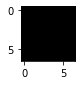

mean regions of 6 regions more=True or worst=False active for filter number: 7 :


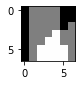

mean regions of 6 regions more=True or worst=False active for filter number: 8 :


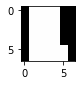

mean regions of 6 regions more=True or worst=False active for filter number: 9 :


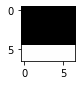

mean regions of 6 regions more=True or worst=False active for filter number: 10 :


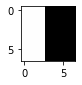

mean regions of 6 regions more=True or worst=False active for filter number: 11 :


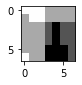

mean regions of 6 regions more=True or worst=False active for filter number: 12 :


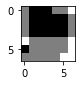

mean regions of 6 regions more=True or worst=False active for filter number: 13 :


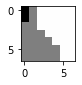

mean regions of 6 regions more=True or worst=False active for filter number: 14 :


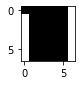

mean regions of 6 regions more=True or worst=False active for filter number: 15 :


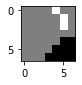

mean regions of 6 regions more=True or worst=False active for filter number: 16 :


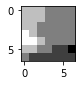

mean regions of 6 regions more=True or worst=False active for filter number: 17 :


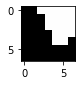

mean regions of 6 regions more=True or worst=False active for filter number: 18 :


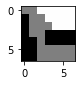

mean regions of 6 regions more=True or worst=False active for filter number: 19 :


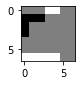

grid image
grid regions of 6 regions more=True or worst=False active for filter number: 0 :


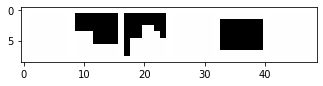

grid regions of 6 regions more=True or worst=False active for filter number: 1 :


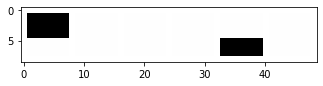

grid regions of 6 regions more=True or worst=False active for filter number: 2 :


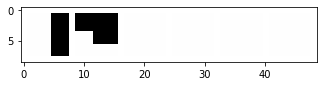

grid regions of 6 regions more=True or worst=False active for filter number: 3 :


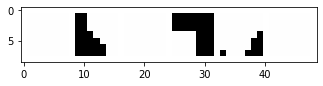

grid regions of 6 regions more=True or worst=False active for filter number: 4 :


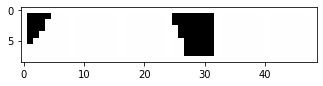

grid regions of 6 regions more=True or worst=False active for filter number: 5 :


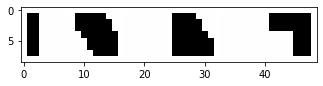

grid regions of 6 regions more=True or worst=False active for filter number: 6 :


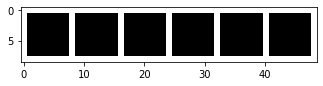

grid regions of 6 regions more=True or worst=False active for filter number: 7 :


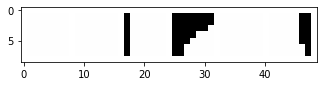

grid regions of 6 regions more=True or worst=False active for filter number: 8 :


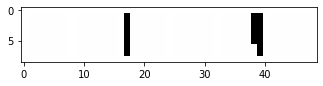

grid regions of 6 regions more=True or worst=False active for filter number: 9 :


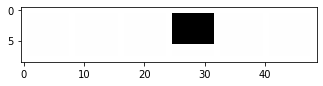

grid regions of 6 regions more=True or worst=False active for filter number: 10 :


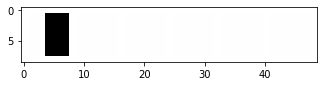

grid regions of 6 regions more=True or worst=False active for filter number: 11 :


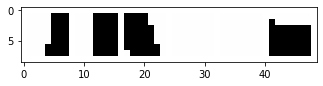

grid regions of 6 regions more=True or worst=False active for filter number: 12 :


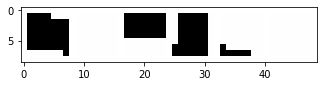

grid regions of 6 regions more=True or worst=False active for filter number: 13 :


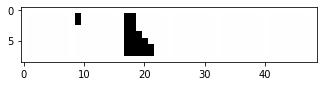

grid regions of 6 regions more=True or worst=False active for filter number: 14 :


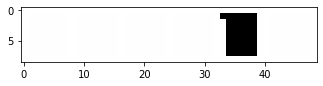

grid regions of 6 regions more=True or worst=False active for filter number: 15 :


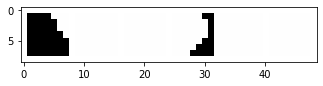

grid regions of 6 regions more=True or worst=False active for filter number: 16 :


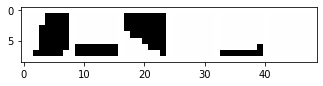

grid regions of 6 regions more=True or worst=False active for filter number: 17 :


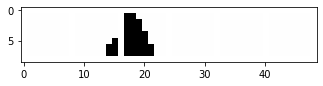

grid regions of 6 regions more=True or worst=False active for filter number: 18 :


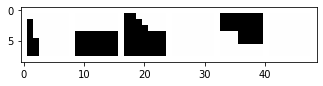

grid regions of 6 regions more=True or worst=False active for filter number: 19 :


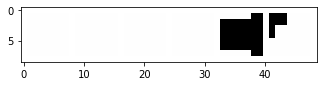

In [33]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)